In [5]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [6]:
DATASET="train"
DATASET2="valid"

In [7]:
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

In [8]:
train_data=[]

In [9]:
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [10]:
test_data=[]

In [11]:
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET2,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [12]:
print(len(train_data))
print(len(test_data))

18345
4585


In [13]:
import random

In [14]:
random.shuffle(train_data)
random.shuffle(test_data)

In [15]:
for lbl in train_data[:10]:
    print(lbl[1])

4
9
5
0
7
5
7
9
1
1


In [16]:
X_train=[]
y_train=[]

In [17]:
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [18]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("BACTERIAL SPOT")
    elif i==1:
        Y.append("EARLY BLIGHT")
    elif i==2:
        Y.append("HEALTHY")
    elif i==3:
        Y.append("LATE BLIGHT")
    elif i==4:
        Y.append("LEAF MOLD")
    elif i==5:
        Y.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Y.append("SPIDER MITE")
    elif i==7:
        Y.append("TARGET SPOT")
    elif i==8:
        Y.append("MOSAIC VIRUS")
    else:
        Y.append("YELLOW LEAF CURL VIRUS")

In [19]:
len(X_train),len(y_train)

(18345, 18345)

In [20]:
X_test=[]
y_test=[]

In [21]:
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [22]:
Z=[]
for i in y_test:
    if i==0:
        Z.append("BACTERIAL SPOT")
    elif i==1:
        Z.append("EARLY BLIGHT")
    elif i==2:
        Z.append("HEALTHY")
    elif i==3:
        Z.append("LATE BLIGHT")
    elif i==4:
        Z.append("LEAF MOLD")
    elif i==5:
        Z.append("SEPTORIA LEAF SPOT")
    elif i==6:
        Z.append("SPIDER MITE")
    elif i==7:
        Z.append("TARGET SPOT")
    elif i==8:
        Z.append("MOSAIC VIRUS")
    else:
        Z.append("YELLOW LEAF CURL VIRUS")

In [23]:
len(X_test),len(y_test)

(4585, 4585)

In [24]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(18345, 64, 64, 3)

In [25]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(4585, 64, 64, 3)

In [26]:
order=['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS']

Text(0, 0.5, 'Image Count')

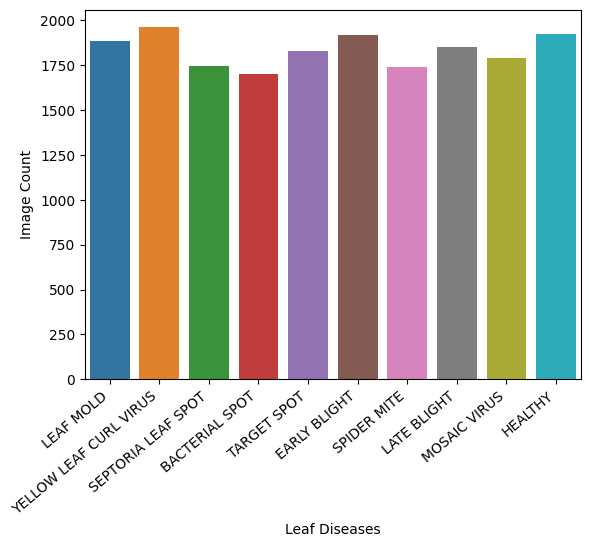

In [27]:
ax=sns.countplot(x=Y)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

Text(0, 0.5, 'Image Count')

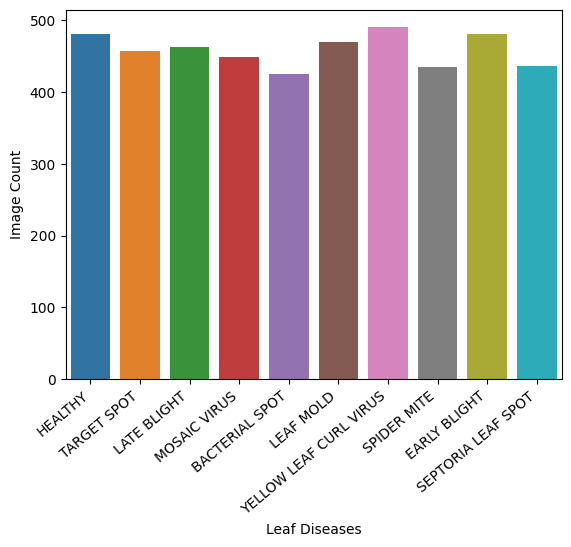

In [28]:
ax=sns.countplot(x=Z)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

In [29]:
from keras.utils.np_utils import to_categorical

In [30]:
one_hot_train=to_categorical(y_train)
one_hot_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [33]:
classifier=Sequential()

In [34]:
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

In [35]:
classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

In [36]:
classifier.add(Conv2D(128,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.4))

In [37]:
classifier.add(Flatten())

In [38]:
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dense(activation='softmax', units=10))

In [39]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       7

In [41]:
hist=classifier.fit(X_train,one_hot_train,epochs=75,batch_size=128,validation_split=0.2)

Epoch 1/75
115/115 [==============================] - 100s 855ms/step - loss: 1.8812 - accuracy: 0.3014 - val_loss: 1.4429 - val_accuracy: 0.4873
Epoch 2/75
115/115 [==============================] - 89s 772ms/step - loss: 1.1479 - accuracy: 0.6017 - val_loss: 0.8591 - val_accuracy: 0.7204
Epoch 3/75
115/115 [==============================] - 88s 768ms/step - loss: 0.7372 - accuracy: 0.7441 - val_loss: 0.6383 - val_accuracy: 0.7719
Epoch 4/75
115/115 [==============================] - 89s 775ms/step - loss: 0.5808 - accuracy: 0.7948 - val_loss: 0.6054 - val_accuracy: 0.7929
Epoch 5/75
115/115 [==============================] - 88s 768ms/step - loss: 0.4722 - accuracy: 0.8308 - val_loss: 0.5215 - val_accuracy: 0.8215
Epoch 6/75
115/115 [==============================] - 88s 768ms/step - loss: 0.4245 - accuracy: 0.8500 - val_loss: 0.3797 - val_accuracy: 0.8719
Epoch 7/75
115/115 [==============================] - 88s 765ms/step - loss: 0.3677 - accuracy: 0.8708 - val_loss: 0.3462 - val_a

In [42]:
test_loss,test_acc=classifier.evaluate(X_test,one_hot_test)
test_loss,test_acc

144/144 [==============================] - 8s 52ms/step - loss: 0.1722 - accuracy: 0.9483


(0.1722206473350525, 0.9483097195625305)

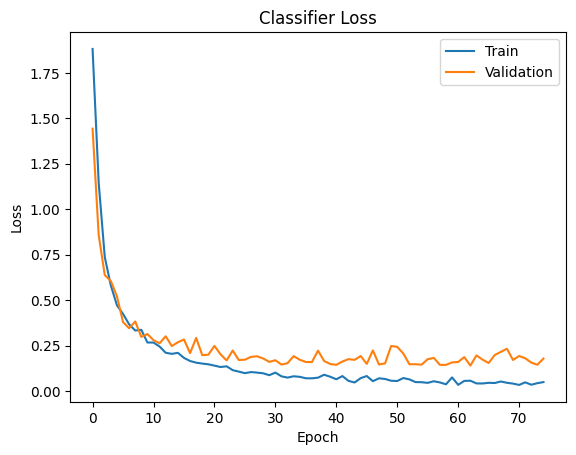

In [43]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

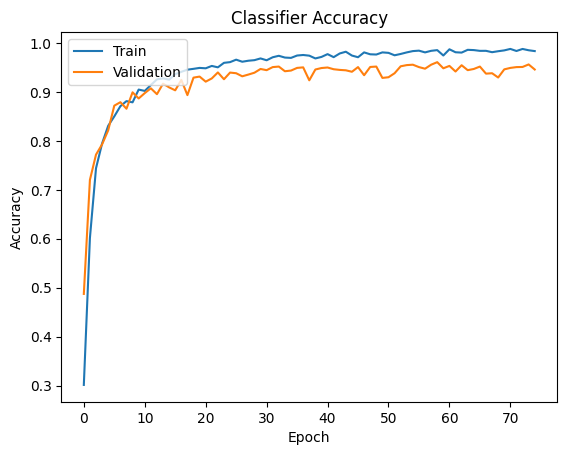

In [44]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [45]:
y_pred=classifier.predict_classes(X_test)
y_pred

C:\Users\91635\anaconda3\envs\tomatoes\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 7, 2, ..., 5, 1, 0], dtype=int64)

In [46]:
y_prob=classifier.predict_proba(X_test)
y_prob

C:\Users\91635\anaconda3\envs\tomatoes\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[3.1531427e-11, 4.1646898e-11, 9.9998879e-01, ..., 1.0959442e-05,
        9.8897901e-10, 4.2422934e-13],
       [1.0538569e-08, 2.8796581e-04, 7.5608988e-08, ..., 9.9969018e-01,
        3.9603865e-08, 3.0805962e-11],
       [1.0217900e-15, 5.0385873e-11, 9.9999917e-01, ..., 5.9303487e-09,
        1.3003884e-13, 5.7020959e-20],
       ...,
       [4.8552000e-08, 9.0873381e-03, 3.4202522e-08, ..., 6.0514636e-02,
        1.0830623e-05, 6.0023062e-08],
       [3.4988226e-08, 9.7887051e-01, 2.4115783e-09, ..., 5.9333026e-08,
        2.5973410e-10, 2.7848837e-09],
       [1.0000000e+00, 1.3185848e-09, 4.8227840e-14, ..., 5.6765324e-13,
        1.9602485e-18, 6.2460925e-09]], dtype=float32)

In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
fpr = {}
tpr = {}
thresh ={}
roc_auc={}

In [50]:
n_class = 10

In [51]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

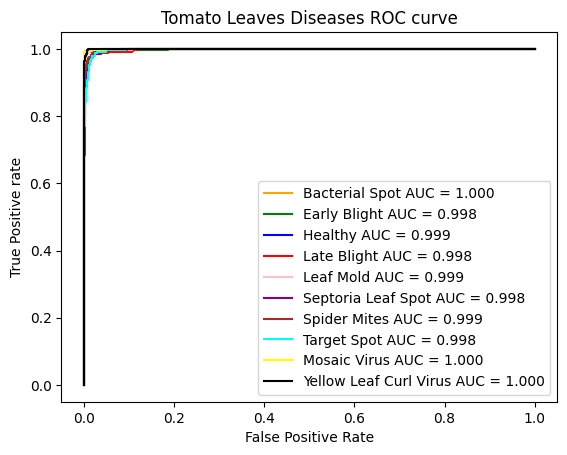

In [52]:
plt.plot(fpr[0], tpr[0], color='orange',label='Bacterial Spot AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Early Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Healthy AUC = %0.3f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='red',label='Late Blight AUC = %0.3f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='pink',label='Leaf Mold AUC = %0.3f' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='purple',label='Septoria Leaf Spot AUC = %0.3f' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='brown',label='Spider Mites AUC = %0.3f' % roc_auc[6])
plt.plot(fpr[7], tpr[7], color='cyan',label='Target Spot AUC = %0.3f' % roc_auc[7])
plt.plot(fpr[8], tpr[8], color='yellow',label='Mosaic Virus AUC = %0.3f' % roc_auc[8])
plt.plot(fpr[9], tpr[9], color='black',label='Yellow Leaf Curl Virus AUC = %0.3f' % roc_auc[9])
plt.title('Tomato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [53]:
from sklearn.metrics import confusion_matrix

In [60]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       425
           1       0.89      0.97      0.93       480
           2       0.97      0.97      0.97       481
           3       0.97      0.90      0.93       463
           4       0.91      0.99      0.95       470
           5       0.98      0.83      0.90       436
           6       0.93      0.96      0.95       435
           7       0.92      0.93      0.93       457
           8       0.98      0.99      0.99       448
           9       0.96      0.98      0.97       490

    accuracy                           0.95      4585
   macro avg       0.95      0.95      0.95      4585
weighted avg       0.95      0.95      0.95      4585



In [62]:
classifier.save('tomato_disease_detection_model.h5')